# Real-time Anomaly Detection in Financial Transactions


## Authors and Team

- **Author 1**: Ferris Atassi, Developer
- **Author 2**: Charles Hang, Developer

# Executive Summary

### Decisions to be impacted

Our project will impact decisions to accept or reject financial transactions based on suspicion of fraud. More broadly, it will help fraud detection specialists at financial institutions develop tools to detect fraudulent financial transactions.

### Business Value

According to global card industry research company Nilson Report, $33 billion was lost to credit card fraud in 2022. Reducing that fraud will lead to savings for  companies, which will sell fewer goods and services to fraudulent buyers and thus incur fewer costs associated with such sales (such as chargebacks). For example, the dataset used in this project was provided by Vesta Corporation, which guarantees that credit card transactions will go through in exchange for a cut of the revenues. Whenever a transaction does turn out to be fraudulent, Vesta is responsible for compensating the seller for the lost volume. Reducing credit card fraud by detecting it when it happens will reduce costs for transaction guarantee companies such as Vesta.

Similarly, reducing the number of fraudulent transactions will help consumers by protecting them from accidentally paying for fraudulent transactions and by also lowering how much they pay for goods and services (since providers will not need to raise prices as much to account for fraud costs). 

### Data Assets

This project uses the IEEE-CIS dataset, which was used in the IEEE-CIS Fraud Detection competition on Kaggle in 2019. The dataset consists of 590,540 actual credit card transactions spanning a little over six months. The transactions were provided by Vesta Corporation, a leader in the credit card payment guarantee industry which has also taken an active role in fighting credit card fraud.

### Literature Review

Machine learning and artificial intelligence methods have been used to detect credit card fraud for at least 30 years. Bolton and Hand’s 2001 paper “Unsupervised Profiling Methods for Fraud Detection” outlines how supervised methods were used in the 1990s to detect fraudulent transactions. Reflecting the overall popularity of neural networks in that decade, neural networks were used in supervised learning models for fraudulent transaction detection. Building upon that work, Bolton and Hand outlined how unsupervised methods such as clustering and nearest neighbor methods could be used to build unsupervised learning models to detect fraudulent transactions. Their proposed models, “Peer Group Analysis” and “Break Point Analysis,” grouped accounts into peer groups and analyzed changes in their behavior over time, looking for moments (“break points”) in which individual accounts’ behavior suddenly diverged from that of their peers, which could be indicative of fraud.

Bhattacharyya et al.’s 2011 paper “Data mining for credit card fraud: A comparative study” outlined additional fraud detection methods being used in industry around that time. The paper compared the performance of three methods–logistic regression, random forests, and support vector machines. All three methods had strong performances, with precision scores around 0.8. However, these high precision scores were generated through extremely high specificity values (all around 0.98), meaning that all three methods were successful in labeling 98% of legitimate transactions as legitimate. However, all three methods had much lower sensitivity values (around 0.5 to 0.7), indicating that they had much more difficulty in detecting fraudulent transactions from the overall pool of transactions. 

**Comparison of Fraud Detection Techniques from Bhattacharya et al. (2011)**

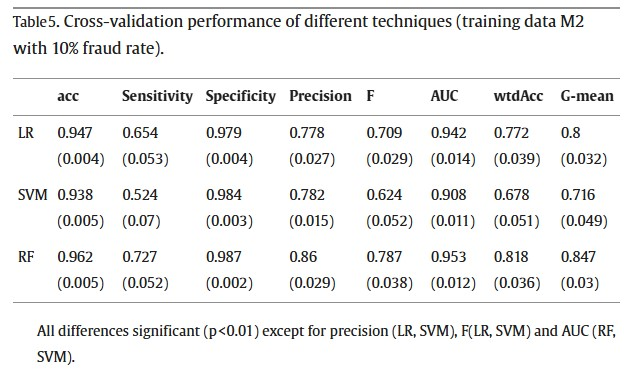

A preference for higher specificity and lower sensitivity might have business value, since it prevents customers from regularly having their transactions declined incorrectly, thus reducing customer friction and improving customer satisfaction. However, it does also shift the burden of fraud onto credit card issuers, since it means allowing more fraudulent transactions to go through, which later have to be reversed, a cost usually incurred by the issue. In that context, it was notable that random forest models managed the highest sensitivity score of the three models (0.727) while also maintaining the highest specificity (0.987). Because of this, one of the models used in our project was the isolation random forest model, a variant of the random forest model outlined in Bhattacharyya et al.’s paper, which we hoped would have even stronger performance. Additionally, we also included a CART Tree, a simpler decision tree model, which reflects the ubiquity of decision tree models in the fraud detection space, as noted by Bhattacharyya et al.’s paper.

In the past decade, more exotic methods have been proposed for credit card fraud detection. Fiore et al.’s 2014 paper outlined a method for using generative adversarial networks (GANs) to account for the fact that most credit card fraud datasets are highly imbalanced, in that the overwhelming majority of transactions in the datasets are not fraudulent. To account for this, Fiore et al. used a generative adversarial network in which two neural networks competed against one another, with one generating new transactions while the other tries to discriminate whether the newly generated transactions are fraudulent or not. The GAN-based methods generated extremely high specificity values ranging around 0.99998, but their sensitivity levels were around 0.7, no higher than the best performances from techniques used in the previous decade. Also, the paper compared the performance of their GAN models with the performance of SMOTE, another classification technique used in imbalanced datasets, and found that the two methods’ performance was similar. In that context, we chose to use SMOTE as another classification tool in our project, since it is easier to configure than a GAN.

A final category of models popularly used in credit card fraud detection is gradient boosting models. Several papers published since 2020 in response to the publication of the IEEE-CIS credit card fraud dataset have proposed gradient boosting models as a solution to detecting fraudulent transactions in the dataset. For example, Xiao et al.’s paper presented at the 7th International Conference on Economic Management and Green Development compared the effectiveness of three different gradient boosting methods–Categorical Boost (CatBoost), Extreme Boost (XGBoost) and LightGBM (LGBM)–and managed to achieve an accuracy score of 96.77% using these methods. Similarly, the top two solutions in the original IEEE-CIS fraud detection competition on Kaggle also used those three gradient boosting techniques. In that context, we also implemented a gradient boosting technique, XGBoost, as one of our fraud detection methods to see if it would outcompete the performance of the older techniques outlined in this literature review.

# Data Preprocessing

- Data Description -- summary of datasets and visualizations of input data
- Introduce the data cleaning metrics you used in the process and outlier detection.

The data consisted of 2 training and 2 test datasets: train_identity, test_identity, train_transaction, and test_transaction. The two identity datasets consist of data about the participants in each transaction in the two transaction datasets. They key feature in the transaction datasets is the 'isFraud' field, indicating whether a transaction has been flagged as fraudulent or not. The first step in preprocessing the data was to combine the two test and two train datasets into one train and one test dataset.

The Train and Test datasets consists of several groups of features: TransactionID: ID of the transaction, TransactionDT: timestamp of transaction, TransactionAMT: transaction amount, ProductCD: product code, card1-6: card type and other information, addr1-2: billing address of transaction, dist1-2: distance from billing adress to address of purchase, P_emaildomain: purchaser email domain, R_emaildomain: reciever email domain, C1-14: feature that is counted across different transactions (meaning not given in dataset), D1-15: times between transactions (meaning not given in dataset), M1-9: Matches of fields for each transaction (meaning not given in dataset), V1-???: (meaning not derived yet), id_01-id_38: identification information accumulated by anti-fraud software that developed dataset, DeviceType: type of device transaction was done on, and DeviceInfo: information of device. isFraud is a field only present in the train dataset flagging whether a transaction is considered to be fraud or not (0-not fraud, 1-fraud). 

Current visualizations include: counts of fraudulent vs non-fraudulent transactions (bar chart), transaction amounts of fraudulent transactions (histogram), Zscores of fraudulent transaction amounts (histogram), Credit card distributor frequency (histogram), debit/credit for transaction frequency comparisons (histogram), email domains for both purchaser and merchant (histogram), billing region frequency (histogram), billing country frequency (histogram), day of week frequency of transactions (histogram), transaction by week (histogram), transaction by month (histogram), fraudulent transaction by day of week and billing region (heatmap), 2D PCA visualization (scatterplot), card transaction mean vs. std dev (scatter plot), CART tree visualization (decision tree),CART tree feature importance visualization (histogram), ROC Curve for XGBoost and CART tree (ROC Curve), Precision Recall Curve for XGBoost and CART tree (Precision Recall), and Calibration Curve for XGboost and Cart Tree (Calibration Curve). An example visualization is below:

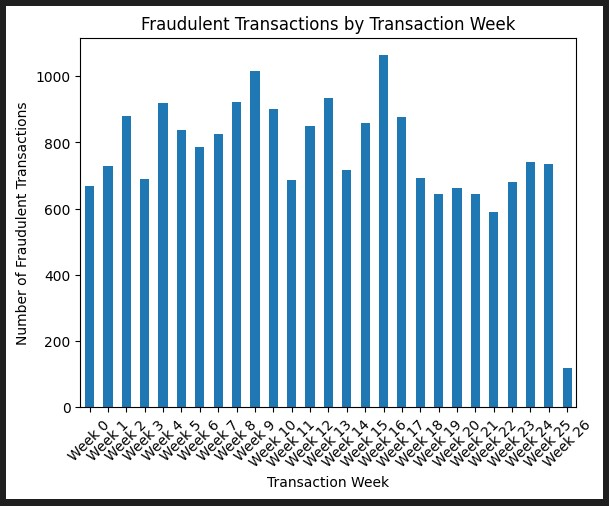

To clean the dataset and deal with outliers, multiple measures were put into place. During inital elementary data analysis, there were many fields found to have over 80% of their entires read as empty or null. To combat this, whenever we were to utilize numerical computation (feature engineering, fitting/training models, etc..), we would run this program numeric_cols_train.fillna(numeric_cols_train.mean()) to fill all empty entries with the means of that column, ultimately allowing for computation for every entry. One drawback is that it normalizes our dataset, reducing variability while introducing more bias into our analysis; this underestimates uncertainty. In our Cart Tree classification analysis, there were too many categorical features for fitting the model, thus we decided to utilize sklearn's LabelEncoder library. This effectively allowed us to cast categorical features as numerical through encoding. We also once again filled empty entries with column means for numerical columns and column modes for categorical columns. However, labeling categorical variables as numerical through LabelEncoder intorduces the issue of creating an ordering for categorical features that are not necessarily orderable. Also, once again filling N/A's reduces variability again. This has implications on the result of our CART Tree performance analysis.

Our group utilized two forms of outlier analysis Mahalanobis Outlier Detection and Isolation Forest Anomaly Detection. After utilizing both measures, datasets were saved according to what was remaining after removing outliers. These were then both applied to the original dataset to only keep transactions whose TransactionID remained in both of the newly produced datasets with outlier removed. 

In our CART Tree model, after intitial performance analysis we applied SMOTE to balance the dataset as our elementary data analysis provided much evidence that the dataset is unbalanced. A XGBoost model was then ran after due to non-linearity of data and the fact that XGBoost framework excels with data cotaining many empty values.

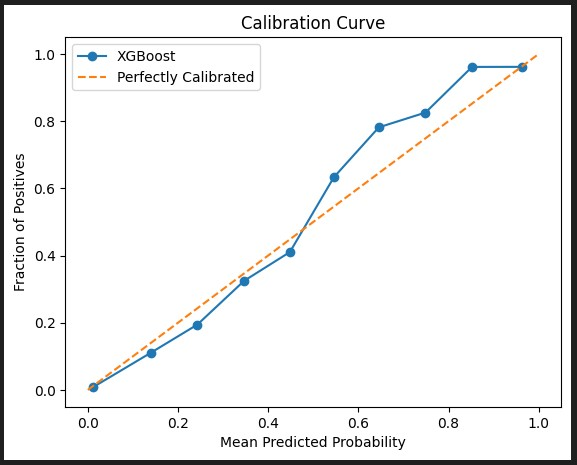

# Model Updates

We are using a CART Tree model to support our decision, with an XGBoost model used as well to combat non-linearity and missing data. 

# Machine Learning Morphism: 

Input Space:
X_raw = trainDF = (train_transaction + train_identity)

Output Space:
Y_pred: A collection of transaction in data set to be classified as fraud. (Ran on X_test)


# 1. Elementary Data Analysis:

Function: F_{EDA} = Analyzes data structures, generates statistics on raw data, clean data (nulls), and generates visualizations. 

Risk Function: R_{EDA} = Minimization of information gaps and ensures a comprehensive understanding of the dataset.

Parameters: Visualization Choices/Settings

# 2. Outlier and Variance Analysis:

Function: F_{OVA} = Detects and removes outliers from dataset (via Mahalanobis and Isolation Forest), variance analysis is performed to work with features with high variance.

Risk Function: R_{OVA} = Minimizes noise within data by dealing with outliers and high variance features, ultimately lets model peform in an environment with less variance but higher bias.

Parameters: Thresholds for Outlier Detection 

# 3. Feature Engineering: 

Function: F_{FE} = Constructs new features based on relations between prexisting features, encodes much of categorical data into a format that can be numerically analyzed. Ultimately structures data to be the best format for model analyzation. 

Risk Function: R_{FE} = Minimizes redundecy of data and allows for model to analyze features that are relevant. 

Parameters: Feature Selection and Process of Encoding Categorical Features

# 4. Classification and Model Training: 

Function: F_{CMT} = Constructs, fits, balances, and utilizes classification models to best classify transactions as Fraud. 

Risk Function: R_{CMT} = Loss functions are utilzied to improve accuracy and decrease frequency of incorrect classifications. 

Parameters: Model Choices and Balancing Methods


# Overall Machine Learning Morphism Workflow:
X_raw -> Y_pred = F_classification ∘ F_featureEngineering ∘ F_outlierVariance ∘ F_ElementaryDataAnalysis(X_raw) 

# Source Code

https://github.com/ferrisatassi1/IEEE_Fraud_Detection_Atassi_Hang

# Next Steps

- Your plan of how to continue or improve your methods/models and the timeline of next steps.

-First Week- 
- Our first priority upon submitting this project is to tune hyperparameters within our CART Tree and XGBoost models
- Try out different sampling techniques other than SMOTE to find one that best fits our data

-Second Week-
- Better our usage of PCA to learn more from it in terms of data cleaning/feature engineering
- Lower data dimensionality 

-Third Week-
- Add regularization to XGBoost and CART Tree
- Calibration to check produced probabilities from model
- Add additional Boost methods (LGBM, CatBoost)

-Fourth Week-
- Test Model on different sampling sizes/Using data from unused datasets

# Sources

Bhattacharyya, Siddhartha, et al. “Data Mining for Credit Card Fraud: A Comparative Study.” Decision Support Systems, vol. 50, no. 3, Feb. 2011, pp. 602–613, https://doi.org/10.1016/j.dss.2010.08.008.

Bolton, Richard, and David Hand. Unsupervised Profiling Methods for Fraud Detection. 2001.

Castillo, Michelle. “Why Credit Card Fraud Alerts Are Rising, and How Worried You Should Be about Them.” CNBC, 12 Sept. 2024, www.cnbc.com/2024/09/12/why-credit-card-fraud-alerts-are-rising.html.

Fiore, Ugo, et al. “Using Generative Adversarial Networks for Improving Classification Effectiveness in Credit Card Fraud Detection.” Information Sciences, vol. 479, Apr. 2019, pp. 448–455, https://doi.org/10.1016/j.ins.2017.12.030.

Foote, Keith D. “A Brief History of Machine Learning - DATAVERSITY.” DATAVERSITY, 3 Dec. 2021, www.dataversity.net/a-brief-history-of-machine-learning/.

“IEEE-CIS Fraud Detection.” @Kaggle, 2024, www.kaggle.com/competitions/ieee-fraud-detection/leaderboard. Accessed 28 Oct. 2024.

Xiao, Zhijia. “IEEE-CIS Fraud Detection Based on XGB.” Applied Economics and Policy Studies, 1 Jan. 2024, pp. 1785–1796, https://doi.org/10.1007/978-981-97-0523-8_159. Accessed 28 Oct. 2024.